In [64]:
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./dracula.mplstyle')
import logging
LOG = logging.getLogger(__name__)
LOG.setLevel(logging.INFO)
LOG.info('Hello from notebook')

from pydataset import data

import frankenfit as ff
reload(ff.core)
reload(ff.transforms)
reload(ff.io)
reload(ff.graph)
reload(ff)

import pyarrow.dataset as ds

logging.getLogger('frankenfit').setLevel(logging.INFO)

In [65]:
ff.ReadPyArrowDataset('./diamonds.csv')

ReadPyArrowDataset(tag='ReadPyArrowDataset#1', paths=['./diamonds.csv'], format=None, columns=None, filter=None, index_col=None, dataset_kwargs=None, scanner_kwargs=None)

In [67]:
ff.ReadDataset(
    './diamonds.csv',
    format='csv',
    filter=(ds.field('index') > 2) & (ds.field('index') < 7),
    index_col='index',
).apply()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [68]:
bindings = {'filter': (ds.field('index') > 2) & (ds.field('index') < 7)}

ff.ReadDataset(
    './diamonds.csv',
    format='csv',
    filter=ff.HP('filter'),
    index_col='index',
).apply(bindings=bindings)


,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [69]:
r = ff.ReadDataset('./diamonds-{foo}.csv', columns=['{foo}'])
r

ReadDataset(tag='ReadDataset#3', paths=['./diamonds-{foo}.csv'], format=None, columns=['{foo}'], filter=None, index_col=None, dataset_kwargs=None, scanner_kwargs=None)

In [70]:
type(r.paths), type(r.columns)

(frankenfit.core.HPCols, frankenfit.core.HPCols)

In [71]:
r = ff.ReadDataset('./diamonds.csv', format='csv')
r.apply()

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [72]:
import pyarrow as pa
import pyarrow.parquet as pq

In [73]:
df = data('diamonds').reset_index().set_index('index')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [74]:
df.loc[3:6]

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [75]:
df.to_csv('./diamonds.csv')

In [76]:
ff.WritePandasCSV(
    './diamonds.csv',
    index_label='index',
).apply(df)

ff.ReadPandasCSV('./diamonds.csv', dict(index_col='index')).apply()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [77]:
r = ff.ReadDataset('./diamonds.csv', format='csv', index_col='index')
r.apply()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [78]:
ff.ReadPandasCSV('./diamonds.csv', dict(index_col=0))

ReadPandasCSV(tag='ReadPandasCSV#2', filepath=HPFmtStr(name='./diamonds.csv'), read_csv_args={'index_col': 0})

In [79]:
ff.ReadPandasCSV('./diamonds.csv', dict(index_col=0)).apply().head()

,carat,cut,color,clarity,depth,table,price,x,y,z
index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


/home/max/frankenfit/src/frankenfit/graph.py:336: RuntimeWarning: A constant Transform is non-initial in a Pipeline: ReadPandasCSV(tag='ReadPandasCSV#4', filepath=HPFmtStr(name='./diamonds.csv'), read_csv_args={'index_col': 0}). This is likely unintentional because the output of all preceding Transforms, once computed, will be discarded by the constant Transform.
  warnings.warn(


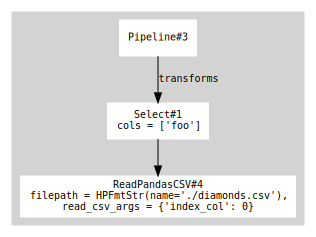

In [80]:
(
    ff.Pipeline()
    [['foo']]
    # should emit RuntimeWarning
    .read_pandas_csv('./diamonds.csv', dict(index_col=0))
).visualize()

In [81]:
ff.Pipeline() + ff.ReadPandasCSV('./diamonds.csv', dict(index_col=0))

Pipeline(tag='Pipeline#5', transforms=[ReadPandasCSV(tag='ReadPandasCSV#5', filepath=HPFmtStr(name='./diamonds.csv'), read_csv_args={'index_col': 0})])

In [82]:
df = data('diamonds').reset_index().drop(['index'], axis=1)

In [83]:
r = ff.ReadPandasCSV('./diamonds.csv', dict(index_col=0))
isinstance(r, ff.Transform)

True

In [84]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [85]:
table = pa.Table.from_pandas(df)
table

pyarrow.Table
carat: double
cut: string
color: string
clarity: string
depth: double
table: double
price: int64
x: double
y: double
z: double
----
carat: [[0.23,0.21,0.23,0.29,0.31,...,0.72,0.72,0.7,0.86,0.75]]
cut: [["Ideal","Premium","Good","Premium","Good",...,"Ideal","Good","Very Good","Premium","Ideal"]]
color: [["E","E","E","I","J",...,"D","D","D","H","D"]]
clarity: [["SI2","SI1","VS1","VS2","SI2",...,"SI1","SI1","SI1","SI2","SI2"]]
depth: [[61.5,59.8,56.9,62.4,63.3,...,60.8,63.1,62.8,61,62.2]]
table: [[55,61,65,58,58,...,57,55,60,58,55]]
price: [[326,326,327,334,335,...,2757,2757,2757,2757,2757]]
x: [[3.95,3.89,4.05,4.2,4.34,...,5.75,5.69,5.66,6.15,5.83]]
y: [[3.98,3.84,4.07,4.23,4.35,...,5.76,5.75,5.68,6.12,5.87]]
z: [[2.43,2.31,2.31,2.63,2.75,...,3.5,3.61,3.56,3.74,3.64]]

In [86]:
table.to_pandas()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [87]:
from attrs import define

@define
class GenerateRandomData(ff.StatelessTransform):
    cols: dict[str, dict]
    nrows: int
    
    def _apply(self, df_apply, state=None):
        return pd.DataFrame({
            c: np.random.normal(size=self.nrows, **cparams) for (c, cparams) in self.cols.items()
        })

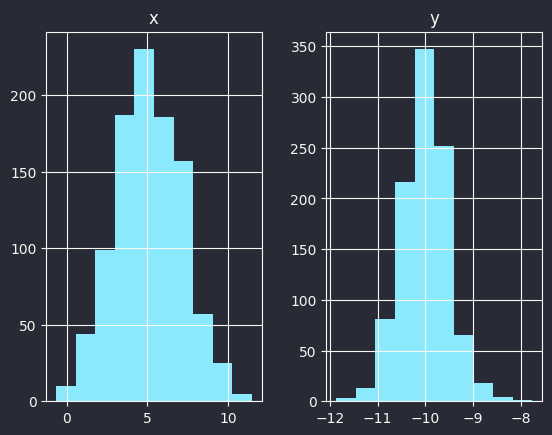

In [88]:
grd = GenerateRandomData(
    {'x': {'loc': 5.0, 'scale': 2.0}, 'y': {'loc': -10.0, 'scale': 0.5}},
    1000
)
grd.apply().hist();

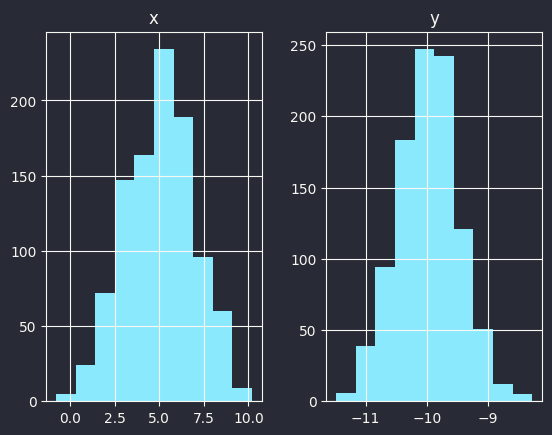

In [90]:
ff.Pipeline().then(grd).apply().hist();

In [91]:
cutmeans = (
    ff.Pipeline()
    .group_by("cut")
        .stateless_lambda(lambda df: df[['price']].mean())
    .rename({'price': 'mean_price'})
)
cutmeans.apply(df)

,cut,mean_price
0,Ideal,3457.541970
1,Premium,4584.257704
2,Good,3928.864452
3,Very Good,3981.759891
4,Fair,4358.757764


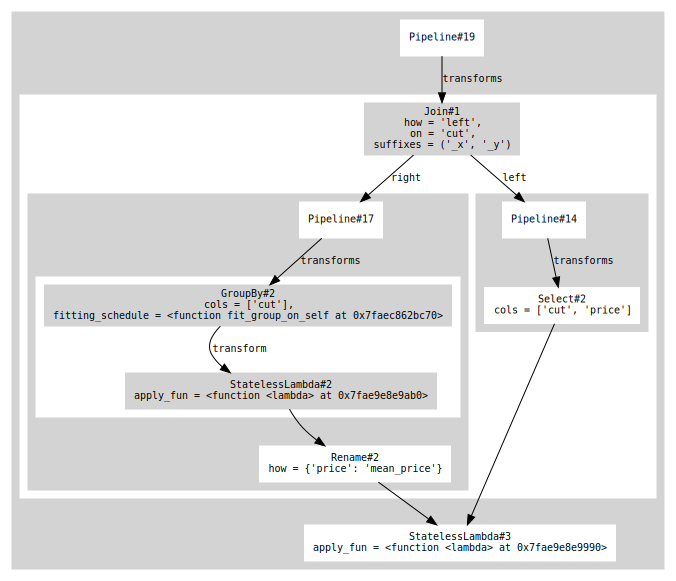

In [92]:
deviances = (
    ff.Pipeline()
    [['cut', 'price']]
    .join(
        (
            ff.Pipeline()
            .group_by("cut")
                .stateless_lambda(lambda df: df[['price']].mean())
            .rename({'price': 'mean_price'})
        ),
        on = 'cut',
        how = 'left'
    )
    .stateless_lambda(lambda df: df.assign(price_deviance=df['price'] - df['mean_price']))
)
deviances.visualize()

In [93]:
result = deviances.apply(df)
result

,cut,price,mean_price,price_deviance
0,Ideal,326,3457.541970,-3131.541970
1,Premium,326,4584.257704,-4258.257704
2,Good,327,3928.864452,-3601.864452
3,Premium,334,4584.257704,-4250.257704
4,Good,335,3928.864452,-3593.864452
...,...,...,...,...
53935,Ideal,2757,3457.541970,-700.541970
53936,Good,2757,3928.864452,-1171.864452
53937,Very Good,2757,3981.759891,-1224.759891
53938,Premium,2757,4584.257704,-1827.257704


In [94]:
result['price_deviance'].mean()

-1.3812718941275172e-13